<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

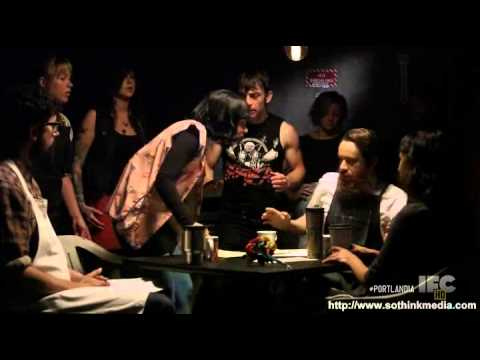

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\sseng\\OneDrive\\Desktop\\Lambda\\projects\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [2]:
import pandas as pd

url = "data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()


(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Imports
import pandas as pd
from collections import Counter

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#import scattertext as st

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [4]:
#removing dates from full_review_text and star rating from star_rating
# shops['full_review_text'] = shops['full_review_text'].str.replace('\d+','')

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r".[0-9]+/[0-9]+/[0-9]+", '', x))
shops['star_rating'] = shops.star_rating.str.extract('(\d+)')
shops.head(2)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [7]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [8]:
# tokenize the text to get a count of the tokens
tokens = [token.text for token in tokenizer(shops['full_review_text'][0])]
print(len(tokens))
print(tokens)

99
[' ', '1', 'check-in', 'Love', 'love', 'loved', 'the', 'atmosphere!', 'Every', 'corner', 'of', 'the', 'coffee', 'shop', 'had', 'its', 'own', 'style,', 'and', 'there', 'were', 'swings!!!', 'I', 'ordered', 'the', 'matcha', 'latte,', 'and', 'it', 'was', 'muy', 'fantastico!', 'Ordering', 'and', 'getting', 'my', 'drink', 'were', 'pretty', 'streamlined.', 'I', 'ordered', 'on', 'an', 'iPad,', 'which', 'included', 'all', 'beverage', 'selections', 'that', 'ranged', 'from', 'coffee', 'to', 'wine,', 'desired', 'level', 'of', 'sweetness,', 'and', 'a', 'checkout', 'system.', 'I', 'got', 'my', 'latte', 'within', 'minutes!', ' ', 'I', 'was', 'hoping', 'for', 'a', 'typical', 'heart', 'or', 'feather', 'on', 'my', 'latte,', 'but', 'found', 'myself', 'listing', 'out', 'all', 'the', 'possibilities', 'of', 'what', 'the', 'art', 'may', 'be.', 'Any', 'ideas?']


## Add Custom stopwords

In [ ]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

In [9]:
#adding custom stopwords
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place', "it's", "i'm", "i've","//",' ', ' ',])

## Tokenize the text

In [10]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False) & (token.is_digit == False) & (token.text != re.match(r".[0-9]+/[0-9]+/[0-9]+", token.text)):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [check-in, located, northcross, mall, shopping...
Name: spaCy_tokens, dtype: object

In [11]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,spaCy_tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[check-in, love, love, loved, atmosphere!, cor..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[check-in, listed, brunch, spots, loved, eclec..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,"[check-in, located, northcross, mall, shopping..."


In [13]:
# get the length of the tokenized text
shops['token_length'] = shops['spaCy_tokens'].apply(lambda x: len(x))
shops.head()

,coffee_shop_name,full_review_text,star_rating,spaCy_tokens,rating,token_length
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[check-in, love, love, loved, atmosphere!, cor...",good,45
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,"[listed, date, night:, austin,, ambiance, aust...",good,26
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[check-in, listed, brunch, spots, loved, eclec...",good,107
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho...",bad,38
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,"[check-in, located, northcross, mall, shopping...",good,61


In [14]:
shops["rating"]= shops['star_rating']
shops.loc[(shops.rating == '4'),'rating']='good'
shops.loc[(shops.rating == '5'),'rating']='good'
shops.loc[(shops.rating == '1'),'rating']='bad'
shops.loc[(shops.rating == '2'),'rating']='bad'
shops.loc[(shops.rating == '3'),'rating']='bad'
shops.head()


,coffee_shop_name,full_review_text,star_rating,spaCy_tokens,rating,token_length
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,"[check-in, love, love, loved, atmosphere!, cor...",good,45
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aus...",4,"[listed, date, night:, austin,, ambiance, aust...",good,26
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,"[check-in, listed, brunch, spots, loved, eclec...",good,107
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,"[cool, decor!, good, drinks, nice, seating, ho...",bad,38
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northc...,4,"[check-in, located, northcross, mall, shopping...",good,61


In [15]:
# get the average length of the tokens grouped by the rating
length_by_rating = shops.groupby("rating")['token_length'].value_counts()
length_by_rating.groupby('rating').mean()

rating
bad      8.245810
good    28.826291
Name: token_length, dtype: float64

In [16]:
# get the average length of the tokens grouped by the star_rating
length_by_rating = shops.groupby("star_rating")['token_length'].value_counts()
length_by_rating.groupby('star_rating').mean()

star_rating
1     2.527273
2     3.709677
3     5.125000
4    13.038674
5    20.322581
Name: token_length, dtype: float64

## Get a count of the tokens then group it by rating

In [17]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts of words in the document set.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [18]:
wc = count(shops['spaCy_tokens'])
print(wc.shape)
wc.head(10)

(38645, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
125,great,2438,3250,1.0,0.008859,0.008859,0.320116
175,like,2034,2902,2.0,0.007911,0.016770,0.267069
177,good,2084,2779,3.0,0.007575,0.024346,0.273634
18,check-in,1957,1961,4.0,0.005346,0.029691,0.256959
30,love,1434,1806,5.0,0.004923,0.034614,0.188288
776,little,1230,1479,6.0,0.004032,0.038646,0.161502
302,don't,1133,1395,7.0,0.003803,0.042449,0.148766
180,nice,1188,1368,8.0,0.003729,0.046178,0.155987
470,food,1092,1363,9.0,0.003715,0.049893,0.143382
601,time,1099,1345,10.0,0.003666,0.053560,0.144301


In [19]:
condition_a = (shops['rating'] == 'good')
condition_b = (shops['rating'] == 'bad')
good_shops = shops[condition_a]
bad_shops = shops[condition_b]

In [20]:
wc_good = count(good_shops['spaCy_tokens'])
print(wc_good.shape)
wc_good.head(10)

(32657, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
125,great,2174,2902,1.0,0.010172,0.010172,0.354072
338,good,1643,2180,2.0,0.007641,0.017813,0.267590
223,like,1486,2068,3.0,0.007248,0.025061,0.242020
30,love,1263,1604,4.0,0.005622,0.030683,0.205700
18,check-in,1598,1602,5.0,0.005615,0.036298,0.260261
591,little,1027,1230,6.0,0.004311,0.040609,0.167264
233,nice,962,1101,7.0,0.003859,0.044468,0.156678
369,best,951,1093,8.0,0.003831,0.048299,0.154886
172,friendly,986,1014,9.0,0.003554,0.051853,0.160586
47,austin,875,1013,10.0,0.003551,0.055404,0.142508


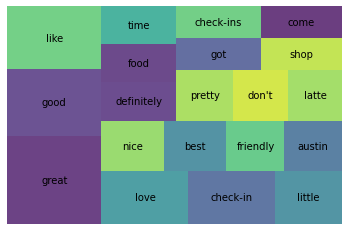

In [22]:
# Good word count visualization
import squarify
import matplotlib.pyplot as plt

wc_top20_good = wc_good[wc_good['rank'] <= 20]
squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [23]:
wc_bad = count(bad_shops['spaCy_tokens'])
print(wc_bad.shape)
wc_bad.head(10)

(15491, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20,like,548,834,1.0,0.010228,0.010228,0.371274
23,good,441,599,2.0,0.007346,0.017574,0.298780
212,don't,340,430,3.0,0.005274,0.022848,0.230352
171,food,266,369,4.0,0.004525,0.027373,0.180217
82,check-in,359,359,5.0,0.004403,0.031776,0.243225
221,time,264,351,6.0,0.004305,0.036081,0.178862
52,pretty,278,349,7.0,0.004280,0.040361,0.188347
123,great,264,348,8.0,0.004268,0.044629,0.178862
518,people,247,327,9.0,0.004010,0.048639,0.167344
16,service,261,314,10.0,0.003851,0.052490,0.176829


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


### Bad reviews will use words like didn't, don't, service, people, time. 
### Good reviews will use words like great, friendly, definitely, love, best.
### From this I understood that things were not done, available, something negative by the number of times words as didn't and don't were used. Time, people and service was referred possibily in a bad conotation also.
### About the best shops, verbs like love, is really good, words such as great, friendly, definitely, best are definitely conveys positive revies.

In [37]:
# Get the frequency for each word based on good
wc_good['good_freq'] = (wc_good['count']/wc_good['count'].sum())
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq
80,great,2174,2902,1.0,0.010207,0.010207,0.354072,0.010207
317,good,1643,2180,2.0,0.007668,0.017875,0.267590,0.007668
232,like,1486,2068,3.0,0.007274,0.025149,0.242020,0.007274
16,love,1263,1604,4.0,0.005642,0.030790,0.205700,0.005642
0,check-in,1598,1602,5.0,0.005635,0.036425,0.260261,0.005635


In [38]:
# Get the frequency for each word based on bad
wc_bad['bad_freq'] = (wc_bad['count']/wc_bad['count'].sum())
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_freq
26,like,548,834,1.0,0.010278,0.010278,0.371274,0.010278
36,good,441,599,2.0,0.007382,0.017660,0.298780,0.007382
204,don't,340,430,3.0,0.005299,0.022959,0.230352,0.005299
49,food,266,369,4.0,0.004547,0.027506,0.180217,0.004547
150,check-in,359,359,5.0,0.004424,0.031930,0.243225,0.004424


In [39]:
print(wc.shape)
wc.head()

(37629, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
80,great,2438,3250,1.0,0.008893,0.008893,0.320116
180,like,2034,2902,2.0,0.007941,0.016834,0.267069
188,good,2084,2779,3.0,0.007604,0.024438,0.273634
0,check-in,1957,1961,4.0,0.005366,0.029804,0.256959
16,love,1434,1806,5.0,0.004942,0.034746,0.188288


In [40]:
#Merge the good and bad freq to the main wc dataframe
wc = pd.merge(wc, wc_good[['word','good_freq']], how='left', on='word')
wc = pd.merge(wc, wc_bad[['word','bad_freq']], how='left', on='word')

In [41]:
# replace NaN values with zero
wc['good_freq'] = wc['good_freq'].fillna(0)
wc['bad_freq'] = wc['bad_freq'].fillna(0)
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq,bad_freq
37624,actuality.,1,1,37625.0,0.000003,0.999989,0.000131,0.000004,0.0
37625,crass.,1,1,37626.0,0.000003,0.999992,0.000131,0.000004,0.0
37626,restrictions.,1,1,37627.0,0.000003,0.999995,0.000131,0.000004,0.0
37627,"specially,",1,1,37628.0,0.000003,0.999997,0.000131,0.000004,0.0
37628,"digestion,",1,1,37629.0,0.000003,1.000000,0.000131,0.000004,0.0


In [42]:
# get the difference in frequencies
wc['freq_diff'] = abs(wc['good_freq'] - wc['bad_freq'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,good_freq,bad_freq,freq_diff
0,great,2438,3250,1.0,0.008893,0.008893,0.320116,0.010207,0.004289,0.005919
1,like,2034,2902,2.0,0.007941,0.016834,0.267069,0.007274,0.010278,0.003004
2,good,2084,2779,3.0,0.007604,0.024438,0.273634,0.007668,0.007382,0.000286
3,check-in,1957,1961,4.0,0.005366,0.029804,0.256959,0.005635,0.004424,0.001210
4,love,1434,1806,5.0,0.004942,0.034746,0.188288,0.005642,0.002489,0.003152


In [43]:
top_ten_diff = wc[['word', 'freq_diff', 'good_freq', 'bad_freq']].nlargest(10, 'freq_diff')
top_ten_diff

,word,freq_diff,good_freq,bad_freq
0,great,0.005919,0.010207,0.004289
4,love,0.003152,0.005642,0.002489
1,like,0.003004,0.007274,0.010278
15,best,0.002957,0.003844,0.000887
23,check-ins,0.002039,0.003271,0.001232
171,asked,0.001962,0.000429,0.002391
17,friendly,0.001952,0.003567,0.001614
46,delicious,0.001916,0.002335,0.000419
6,don't,0.001905,0.003394,0.005299
38,didn't,0.001903,0.001695,0.003598


In [52]:
top_ten_diff.set_index('word')


,freq_diff,good_freq,bad_freq
word,,,
great,0.005919,0.010207,0.004289
love,0.003152,0.005642,0.002489
like,0.003004,0.007274,0.010278
best,0.002957,0.003844,0.000887
check-ins,0.002039,0.003271,0.001232
asked,0.001962,0.000429,0.002391
friendly,0.001952,0.003567,0.001614
delicious,0.001916,0.002335,0.000419
don't,0.001905,0.003394,0.005299


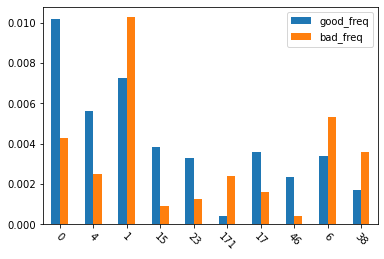

In [53]:
top_ten_diff[['good_freq', 'bad_freq']].plot.bar(rot=-45);

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

